In [1]:

'''
解决汉字乱码问题
'''
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体
plt.rcParams['axes.unicode_minus'] = False
import os
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体
plt.rcParams['axes.unicode_minus'] = False


# 1. 加载数据
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print(f"{os.path.basename(file_path)} 加载成功")
        return data
    except Exception as e:
        print(f"{os.path.basename(file_path)} 加载失败:", e)
        return None


# 2. 数据清理
def clean_data(data):
    # 检查缺失值
    missing_data = data.isnull().sum()
    print("缺失值统计:\n", missing_data[missing_data > 0])

    # 检查重复值
    duplicates = data.duplicated().sum()
    print("重复值数量:", duplicates)

    return data


file_paths = {
    "用户行为表": "电商平台行为数据表/用户行为表.csv",
    "用户表": "电商平台行为数据表/用户表.csv",
    "用户评论表": "电商平台行为数据表/用户评论表.csv",
    "用户购买信息表": "电商平台行为数据表/用户购买信息表.csv",
    "订单表": "电商平台行为数据表/订单表.csv"
}
# 加载各个CSV文件
user_behavior = load_data(file_paths["用户行为表"])
user_info = load_data(file_paths["用户表"])
user_comments = load_data(file_paths["用户评论表"])
purchase_info = load_data(file_paths["用户购买信息表"])
orders = load_data(file_paths["订单表"])

用户行为表.csv 加载成功
用户表.csv 加载成功
用户评论表.csv 加载成功
用户购买信息表.csv 加载成功
订单表.csv 加载成功


In [2]:
user_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42191 entries, 0 to 42190
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   用户id    42191 non-null  int64  
 1   差评      2320 non-null   float64
 2   好评      40963 non-null  float64
 3   中评      2322 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 1.3 MB


In [12]:
# 计算评论数量
comment_counts = user_comments[['好评', '中评', '差评']].sum()
total_comments = user_comments[['好评', '中评', '差评']].sum().sum()
print(comment_counts,"\n","总评论数量为",total_comments)

好评    218250.0
中评      3135.0
差评      2899.0
dtype: float64 
 总评论数量为 224284.0


In [3]:
user_comments.head()

,用户id,差评,好评,中评
0,3,NaN,1.0,NaN
1,7,NaN,2.0,1.0
2,8,NaN,1.0,NaN
3,9,NaN,3.0,NaN
4,11,NaN,11.0,NaN


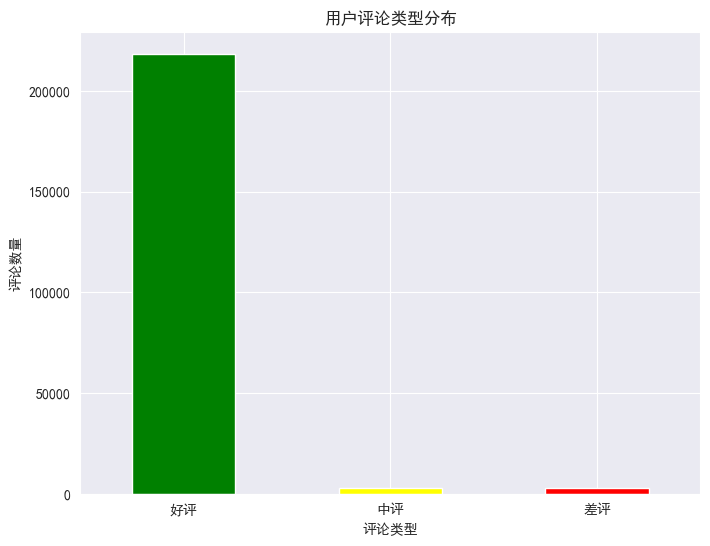

In [13]:
# 绘制条形图
plt.figure(figsize=(8, 6))
comment_counts.plot(kind='bar', color=['green', 'yellow', 'red'])
plt.title('用户评论类型分布')
plt.xlabel('评论类型')
plt.ylabel('评论数量')
plt.xticks(rotation=0)
plt.show()

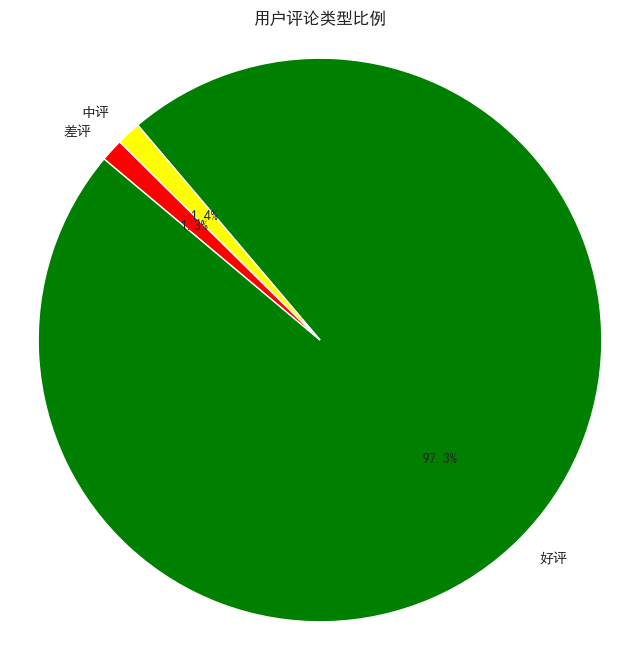

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(comment_counts, labels=comment_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'yellow', 'red'])
plt.title('用户评论类型比例')
plt.axis('equal')  # 确保饼图为圆形
plt.show()